 ## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [12]:
# mnist

In [4]:
x, y = mnist['data'], mnist['target'] # data contains 28 x 28 datasets of images and target is the digit.

In [10]:
x.shape

(70000, 784)

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [14]:
import matplotlib.pylab as plt

In [15]:
some_digit = x[242]
some_digit_image = some_digit.reshape(28, 28) # this will reshape the array into 28 by 28 

In [16]:
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  83.,
         92.,  92., 198.,  92., 198.,  92.,  77.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

(-0.5, 27.5, 27.5, -0.5)

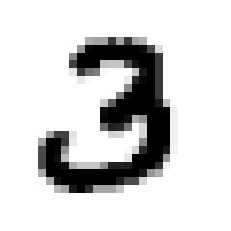

In [17]:
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation = 'nearest')
plt.axis('off') # this will hide the axis

In [18]:
y[3895]

'7'

In [19]:
x_train, x_test = x[0:6000], x[6000:7000]

In [20]:
y_train, y_test = y[0:6000], y[6000:7000]

In [21]:
y_train

array(['5', '0', '4', ..., '8', '6', '9'], dtype=object)

In [22]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]



## Creating a 2 detector

In [23]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = y_train == 2
y_test_2 = y_test == 2

In [25]:
y_train_2

array([False, False, False, ..., False, False, False])

In [26]:
y_test_2

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,

In [27]:
y_train

array([4, 8, 7, ..., 7, 7, 6], dtype=int8)

In [28]:
from sklearn.linear_model import LogisticRegression  

In [29]:
clf = LogisticRegression(tol = 0.1, solver = 'liblinear')

In [30]:
clf.fit(x_train, y_train_2)

LogisticRegression(solver='liblinear', tol=0.1)

In [31]:
clf.predict([some_digit])

array([False])

In [32]:
from sklearn.model_selection import cross_val_score  
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

In [33]:
a.mean()

0.9721666666666667

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv = 3)

In [35]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_train_2, y_train_pred)

array([[5355,   64],
       [ 103,  478]], dtype=int64)

In [38]:
confusion_matrix(y_train_2, y_train_2) #confusion metrix for perfect prediction

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Precision and Recall

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_train_2, y_train_pred)

0.8819188191881919

In [41]:
recall_score(y_train_2, y_train_pred)

0.8227194492254734

In [42]:
# precision_score(y_train_2, y_train_2) #confusion metrix for perfect prediction

## F1 score

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_train_2, y_train_pred)

0.8512911843276938

## Precision Recall Curve

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv = 3, method = 'decision_function')

In [47]:
y_scores

array([ -5.55428791,  -3.04936499, -13.76974058, ...,  -8.98297506,
        -7.74262955,  -2.67777726])

In [48]:
precisions, recalls, threshold = precision_recall_curve(y_train_2, y_scores)

In [49]:
precisions

array([0.11056137, 0.11039208, 0.1104131 , ..., 1.        , 1.        ,
       1.        ])

In [50]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [51]:
threshold

array([-10.74450883, -10.74357899, -10.73193609, ...,  11.70959066,
        11.81865139,  11.95246134])

 ## Plotting the Precision and Recall Curve

<function matplotlib.pyplot.show(*args, **kw)>

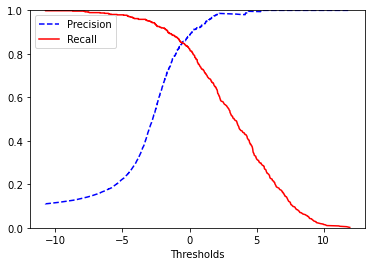

In [52]:
plt.plot(threshold, precisions[:-1], 'b--', label = 'Precision')
plt.plot(threshold, recalls[:-1], 'r-', label = 'Recall')
plt.xlabel('Thresholds')
plt.legend(loc = 'upper left')
plt.ylim([0,1])
# plt.xlim([0,1])
plt.show